In [3]:
from import_data_utils import *
from AlexNet_keras_model import model
amp_list = [4]


2023-11-14 16:39:17.351333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 16:39:17.351681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 16:39:17.351986: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 16:39:17.352286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 16:39:17.377381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "Alex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 57, 57, 96)        34944     
_________________________________________________________________
norm1 (Lambda)               (None, 57, 57, 96)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 28, 28, 96)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 256)       307456    
_________________________________________________________________
norm2 (Lambda)               (None, 28, 28, 256)       0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 13, 13, 256)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 13, 13, 384)       885120 

[(0, 'conv1'),
 (1, 'norm1'),
 (2, 'pool1'),
 (3, 'conv2'),
 (4, 'norm2'),
 (5, 'pool2'),
 (6, 'conv3'),
 (7, 'conv4'),
 (8, 'conv5'),
 (9, 'pool5'),
 (10, 'flatten'),
 (11, 'fc6'),
 (12, 'fc7'),
 (13, 'fc8'),
 (14, 'prob')]

In [3]:
# Import data

with open('/home/mor/NDS_project/results_data/sub2/Vgg/DRC/results_DRC_202304241349/corr_dict.pkl', 'rb') as f:
    corr_dict= pkl.load(f)
corr_dict.keys()

with open('/home/mor/NDS_project/results_data/sub2/Vgg/FF/results_202304241138/corr_dict.pkl', 'rb') as f:
    cor_dict_vgg = pkl.load(f)
cor_dict_vgg.keys()

# with open('/home/mor/NDS_project/results_data/sub1/Alexnet_results_202304131418/corr_dict.pkl', 'rb') as f:
#     cor_dict_alex = pkl.load(f)
# cor_dict_alex.keys()

# with open('/home/mor/NDS_project/results_data/sub2/Alexnet_results_202304131418/corr_dict.pkl', 'rb') as f:
#     cor_dict_alex_drc = pkl.load(f)
# cor_dict_alex.keys()
corr_dict

{pic((224, 0)): {0: {'floc-bodies': {'EBA': [0.035775344045401475,
     0.03075818334032843,
     0.01332576447673323,
     0.0396712228352645,
     0.029912738331783963,
     0.025964788595255108,
     0.026650722692462474,
     0.027746024141607758,
     0.037156913127226666,
     0.03241253197726864,
     0.03479263231588196,
     0.03660345409900629,
     0.054673124381307066,
     0.05137667729900476,
     0.0453649160624228,
     0.06299225549427295,
     0.08766450476508181,
     0.11260909426122404,
     0.11462592307539625,
     0.14053298528917316,
     0.14293844498556288,
     0.15719379106566297,
     0.1600969950017262,
     0.0925634477631167],
    'FBA-1': [nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan,
     nan],
    'FBA-2': [0.02722670022178754,
     0.026802037944619904,
     0.0112319763260

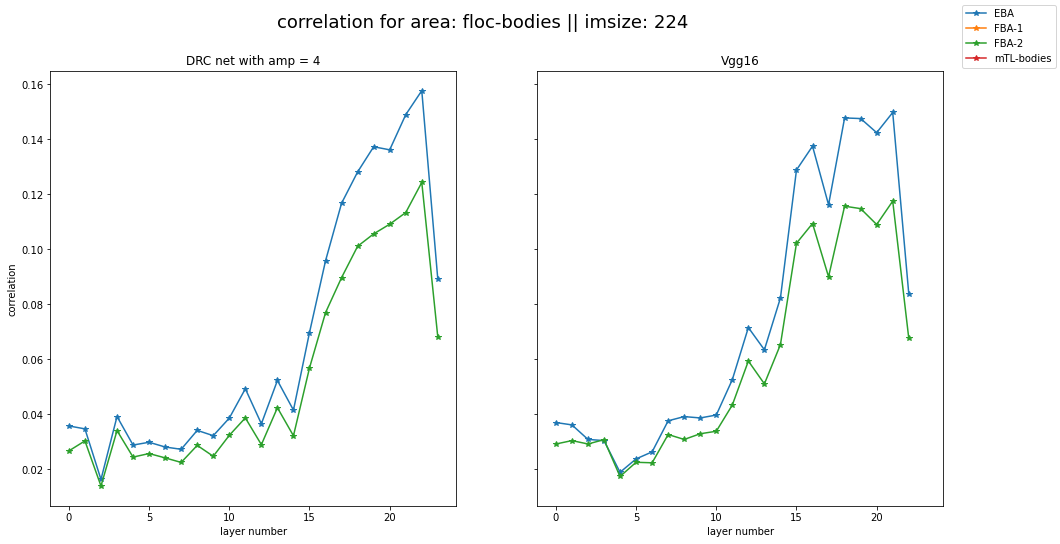

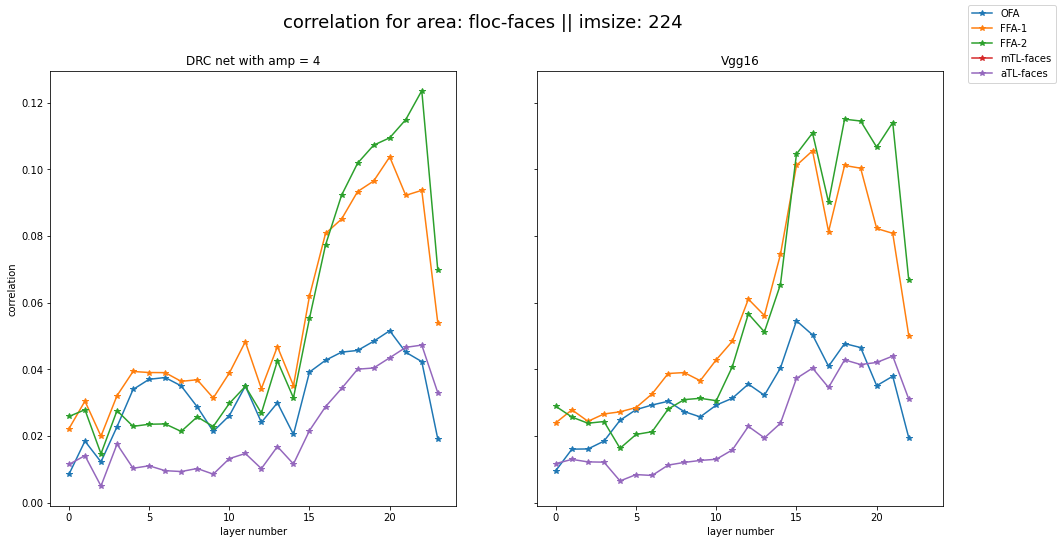

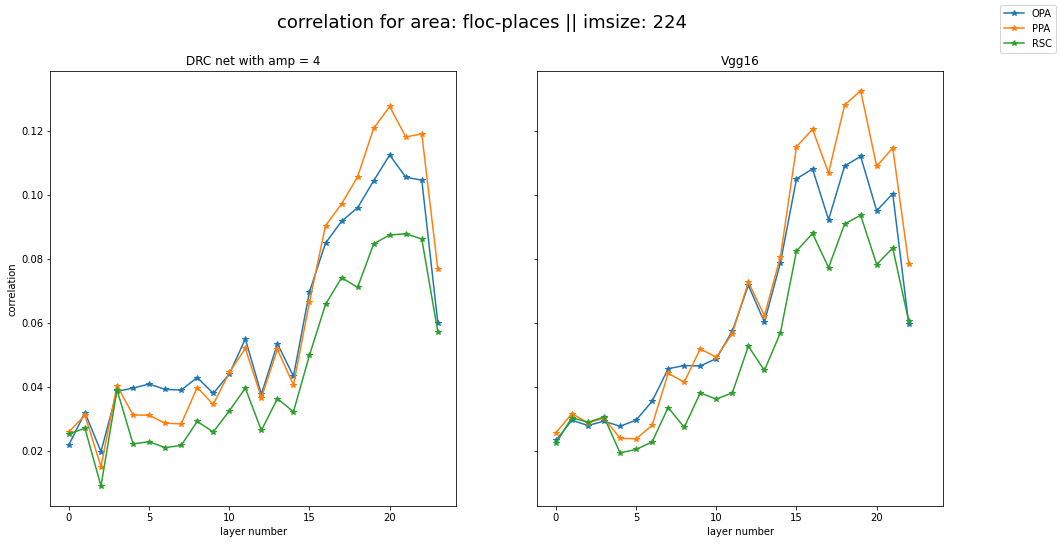

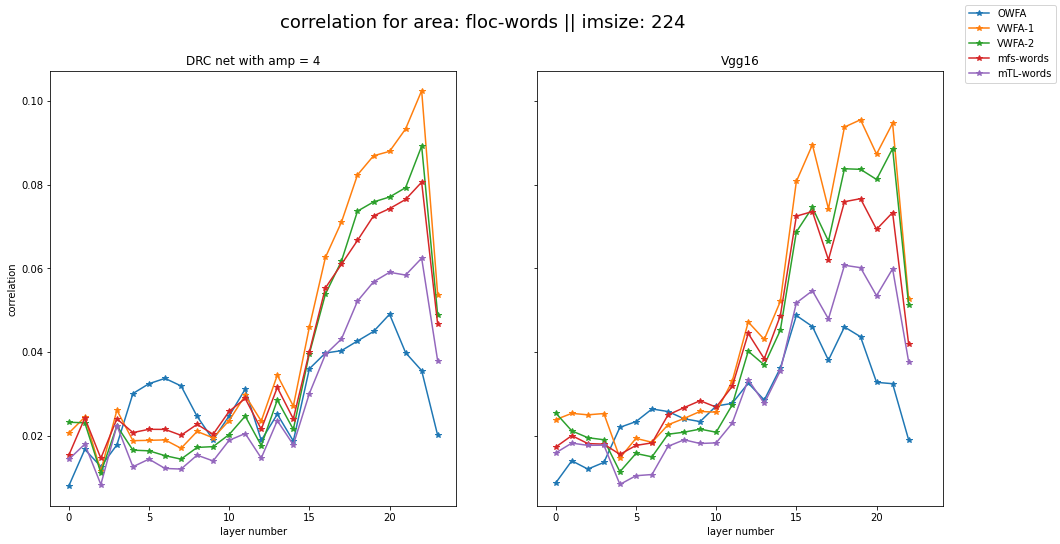

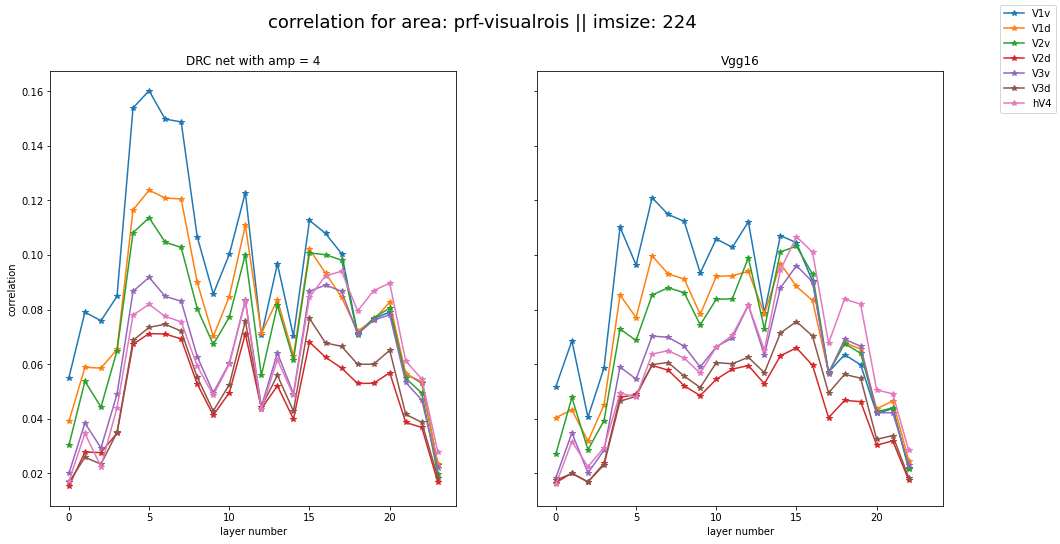

In [3]:
# Ploting comparing regular and DRC 
for amp in amp_list:
    for area in corr_dict[list(corr_dict.keys())[0]][amp].keys():
        fig, axs = plt.subplots(1,len(list(corr_dict.keys())) + 1, figsize=(16, 8),  sharex=True, sharey=True)
        [axs[0].plot(corr_dict[list(corr_dict.keys())[0]][amp][area][roi], '*-') for roi in list(corr_dict[list(corr_dict.keys())[0]][amp][area].keys())]
        [axs[1].plot(cor_dict_vgg[list(cor_dict_vgg.keys())[0]][area][roi], '*-') for roi in list(cor_dict_vgg[list(cor_dict_vgg.keys())[0]][area].keys())]
#         [axs[2].plot(cor_dict_alex[list(cor_dict_alex.keys())[0]][area][roi], '*-') for roi in list(cor_dict_alex[list(cor_dict_alex.keys())[0]][area].keys())]

        
        axs[0].set_title("DRC net with amp = " + str(amp))
        axs[1].set_title("Vgg16")
#         axs[2].set_title("Alexnet")
        axs[0].set_ylabel("correlation")
        axs[0].set_xlabel("layer number")
        axs[1].set_xlabel("layer number")
#         axs[2].set_xlabel("layer number")

        #     [ax2.plot(corr_dict[224][area][roi], '*-') for roi in corr_dict[224][area].keys()]
        fig.legend(corr_dict[list(corr_dict.keys())[0]][amp][area].keys())
        fig.suptitle("correlation for area: " + area + " || imsize: " + str(list(cor_dict_vgg.keys())[0].size), size=18)


In [4]:
with open('/home/mor/NDS_project/results_data/sub2/Alexnet/FF/Alexnet_results_202308141325/corr_dict_vis_all.pkl', 'rb') as f:
    corr_dict_vis_all_vgg_alex = pkl.load(f)
    
with open('/home/mor/NDS_project/results_data/sub2Alexnet/DRC/results_Alexnet_DRC_202308141417/corr_dict_vis_all.pkl', 'rb') as f:
    corr_dict_vis_all_drc_alex = pkl.load(f)

with open('/home/mor/NDS_project/results_data/sub2/Vgg/FF/results_202304241138/corr_dict_vis_all.pkl', 'rb') as f:
    corr_dict_vis_all_vgg = pkl.load(f)
    
with open('/home/mor/NDS_project/results_data/sub2/Vgg/DRC/results_DRC_202304241349/corr_dict_vis_all.pkl', 'rb') as f:
    corr_dict_vis_all_drc = pkl.load(f)

In [63]:
with open('/home/mor/NDS_project/results_data/sub1/Vgg/DRC/results_DRC_202304210811/corr_dict_bodies_all.pkl', 'rb') as f:
    corr_dict_bodies_all_drc = pkl.load(f)
    
with open('/home/mor/NDS_project/results_data/sub1/Vgg/FF/results_202304201002/corr_dict_bodies_all.pkl', 'rb') as f:
    corr_dict_bodies_all_vgg = pkl.load(f)

In [5]:
colors_drc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
colors_alex = ['#fba937', '#14e8ff', '#ce4b4b', '#6ac922', '#c0c743', '#70c2b7', '#64c487']

In [45]:
corr_dict_vis_all_drc

{0: {'V1v': array([[0.05602961, 0.05868479, 0.04565725, 0.05528615, 0.08876402,
          0.07534276, 0.09144583, 0.13730693, 0.11494536, 0.143332  ,
          0.15253725, 0.14399974, 0.1293998 , 0.10627413, 0.11855354,
          0.12460712, 0.09114221, 0.07120817, 0.04727097, 0.0349108 ],
         [0.04918106, 0.05627029, 0.04904922, 0.06282479, 0.08039535,
          0.07770804, 0.08487434, 0.14028209, 0.11195586, 0.11921212,
          0.1655203 , 0.13665647, 0.13814133, 0.09659409, 0.11025927,
          0.13198165, 0.07981117, 0.0781246 , 0.04297568, 0.02934341],
         [0.05269607, 0.06498288, 0.06609532, 0.062871  , 0.07694208,
          0.08898103, 0.08476236, 0.12501265, 0.12010066, 0.10915722,
          0.15963177, 0.13272006, 0.12554603, 0.10063023, 0.12246912,
          0.13376738, 0.09332535, 0.07644481, 0.05113366, 0.03739777],
         [0.06064546, 0.06056462, 0.06378788, 0.05310574, 0.07856322,
          0.0767314 , 0.09272293, 0.13701492, 0.11376445, 0.12896368,
       

/tmp/ipykernel_3397/3593772729.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 5))


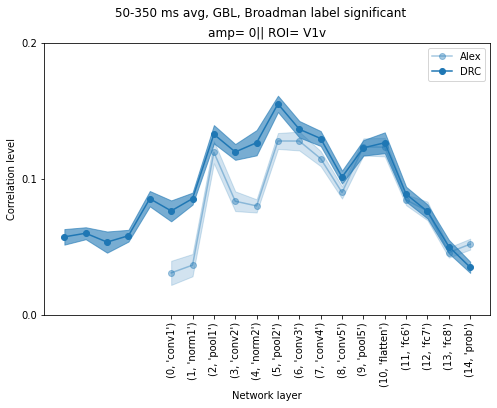

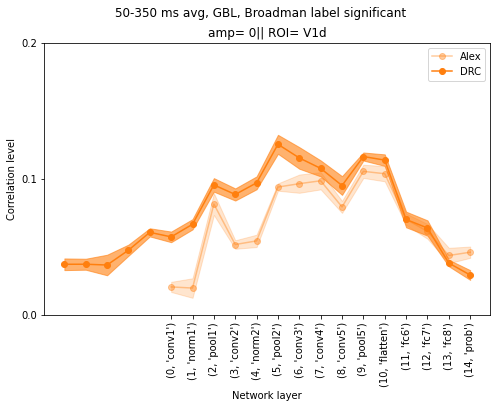

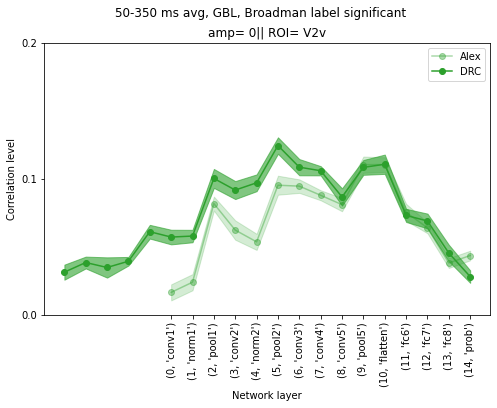

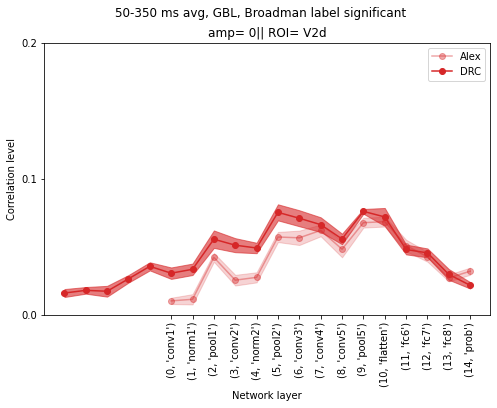

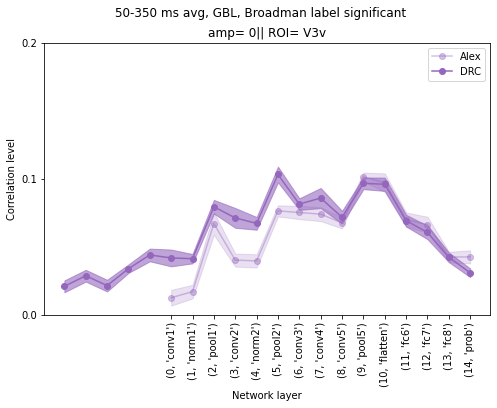

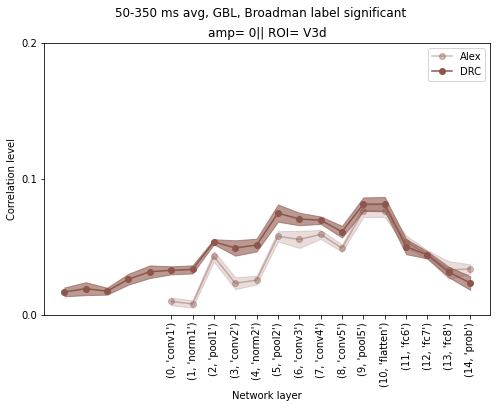

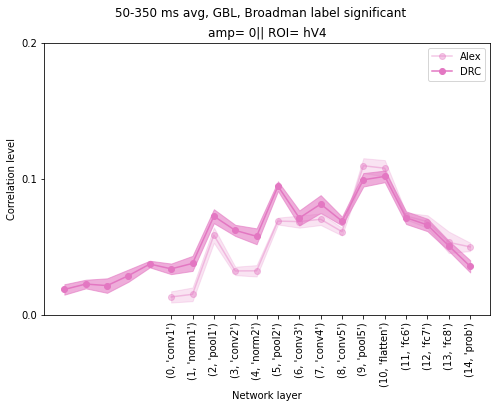

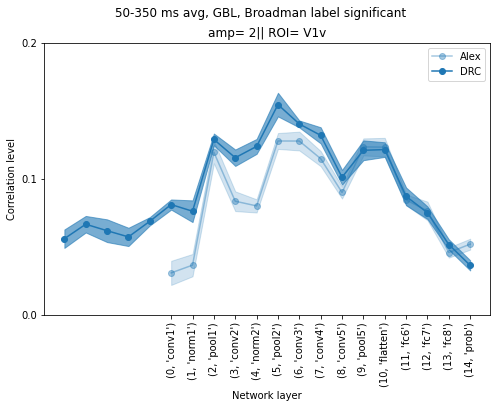

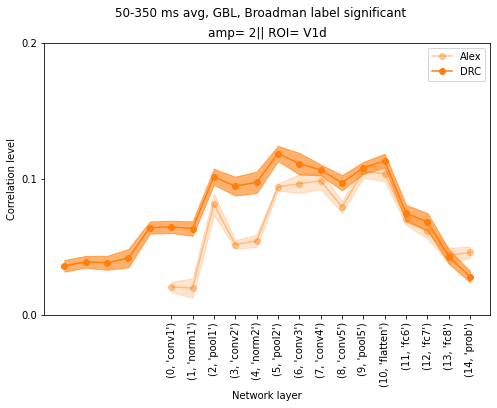

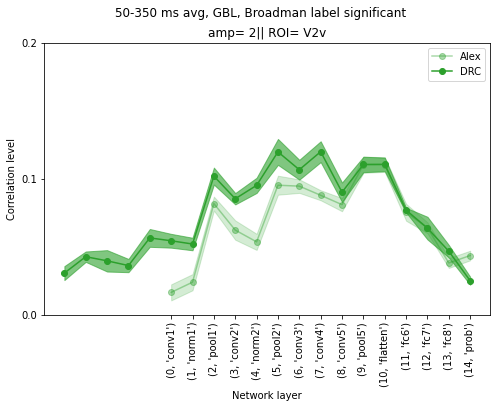

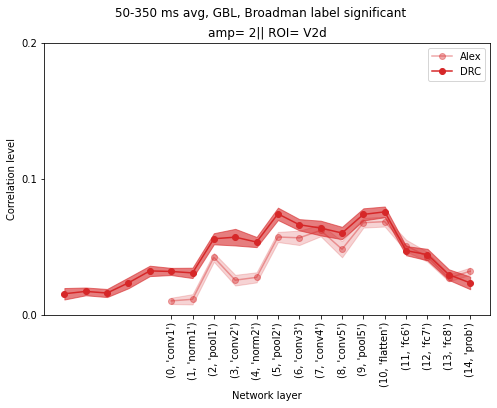

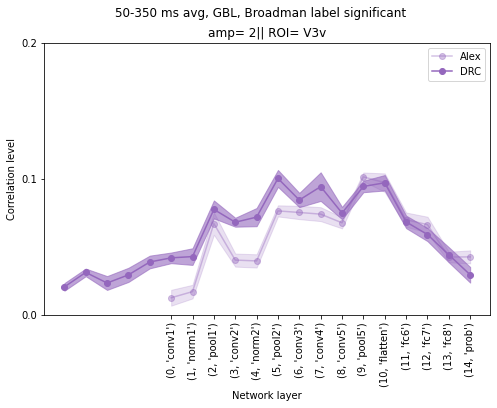

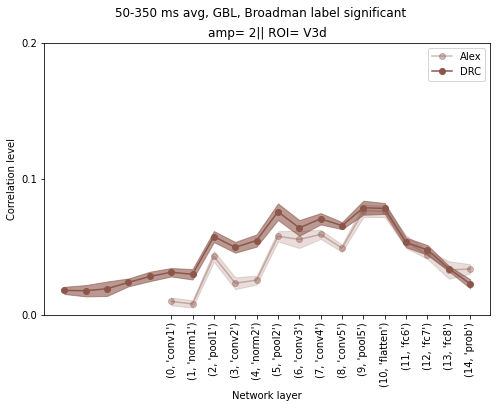

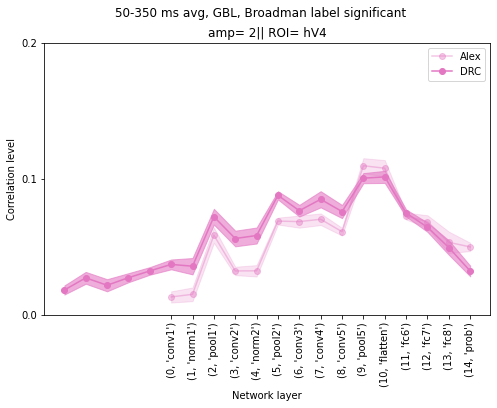

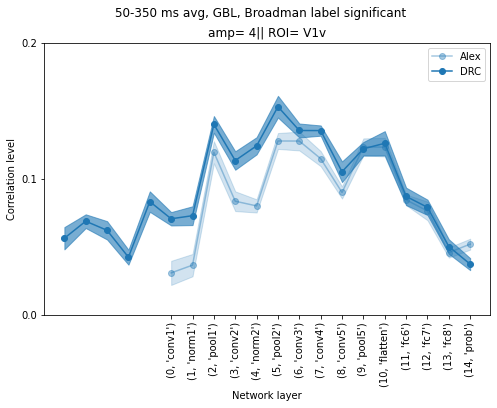

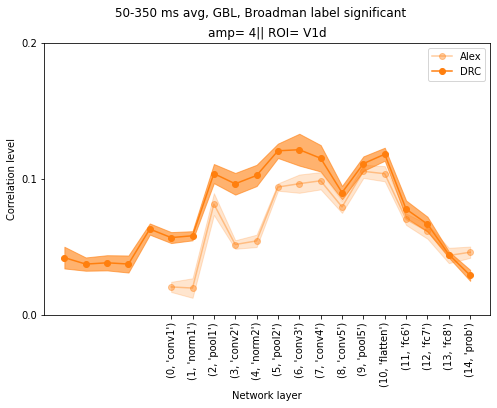

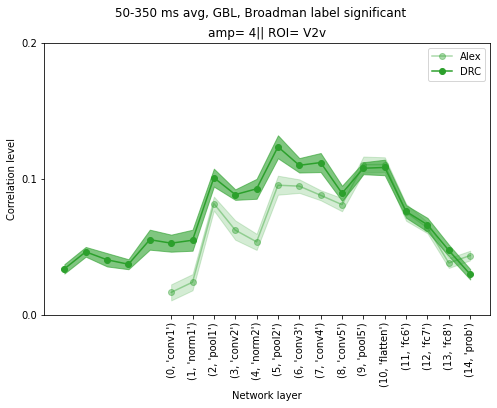

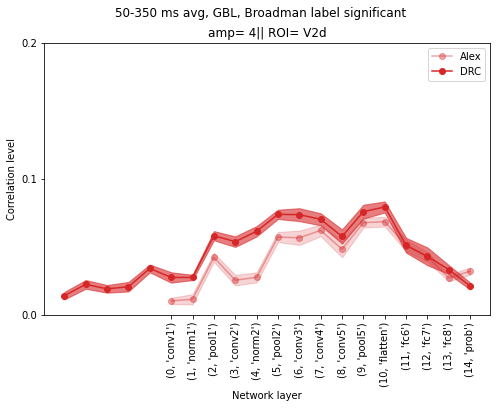

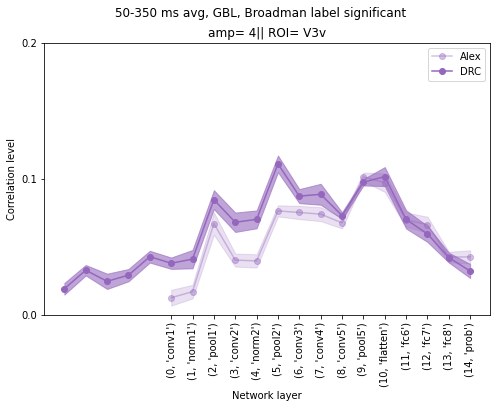

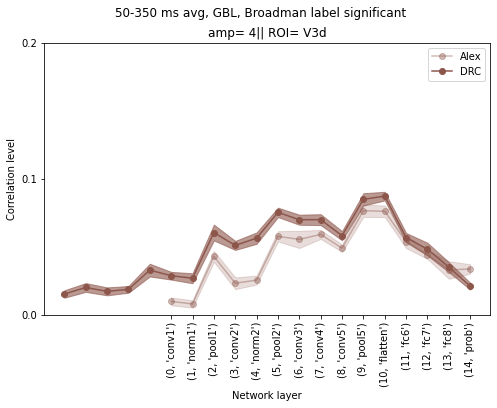

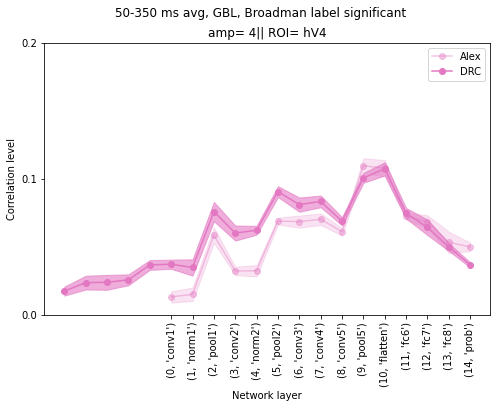

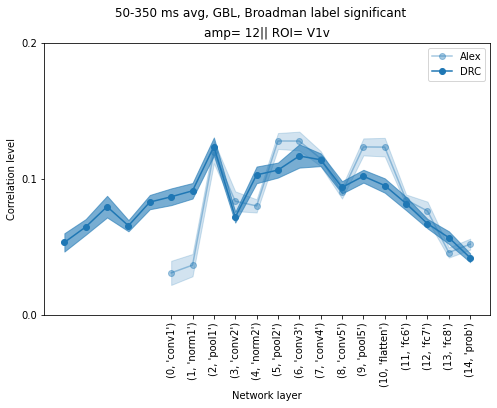

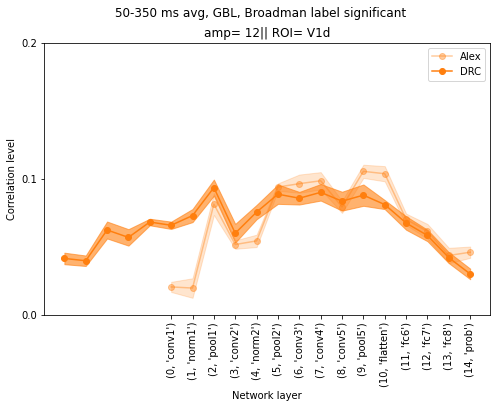

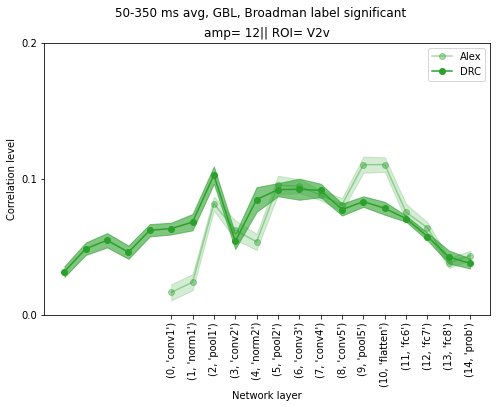

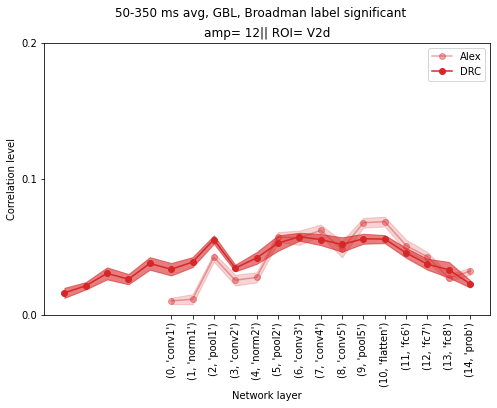

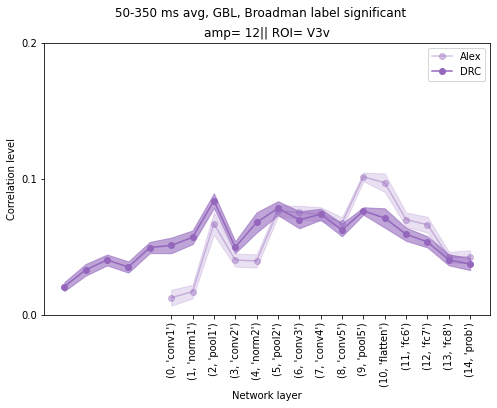

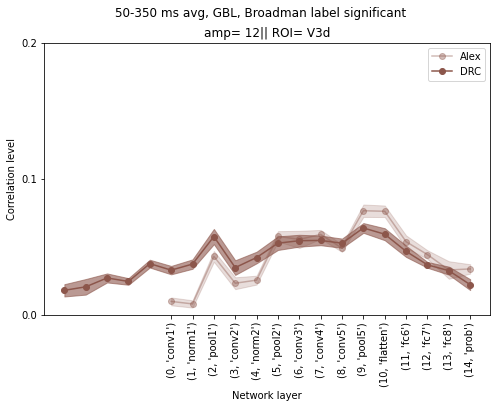

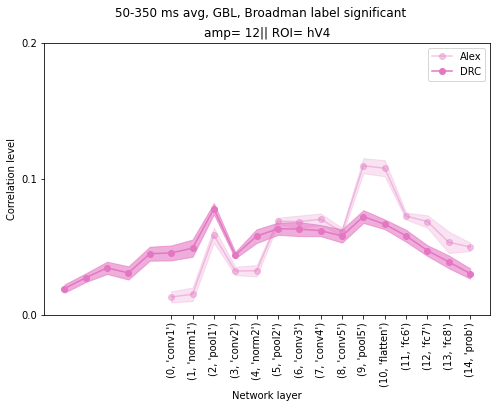

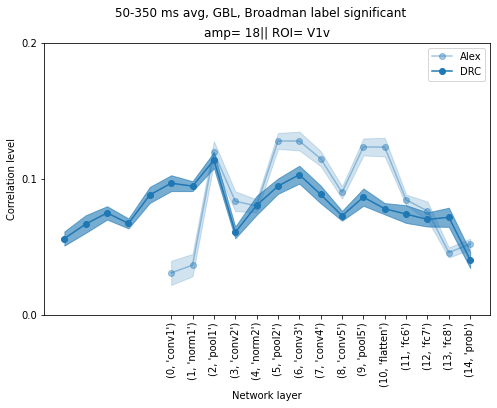

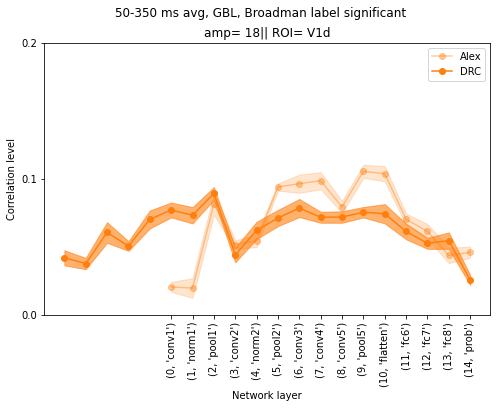

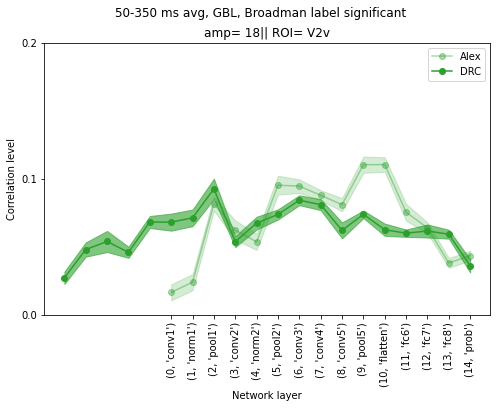

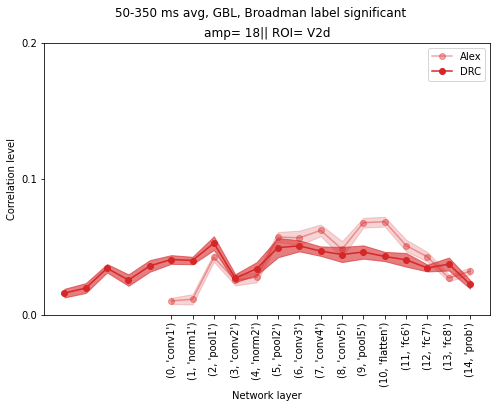

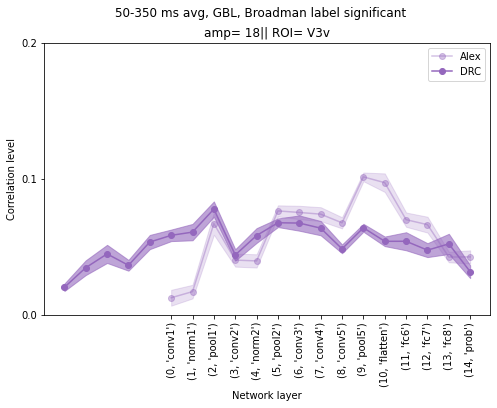

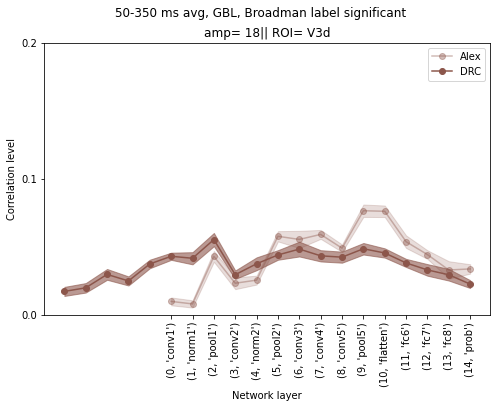

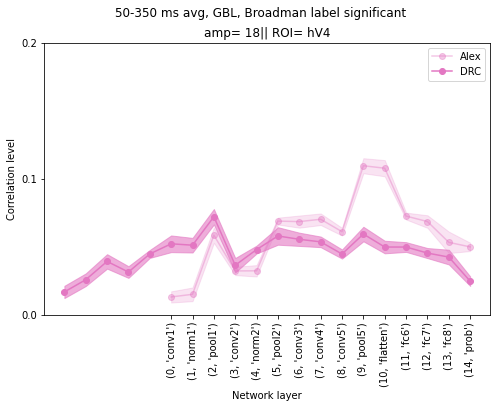

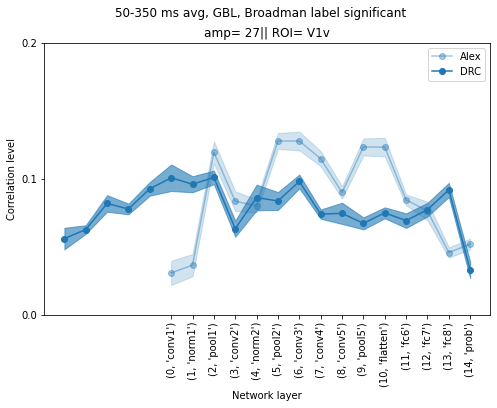

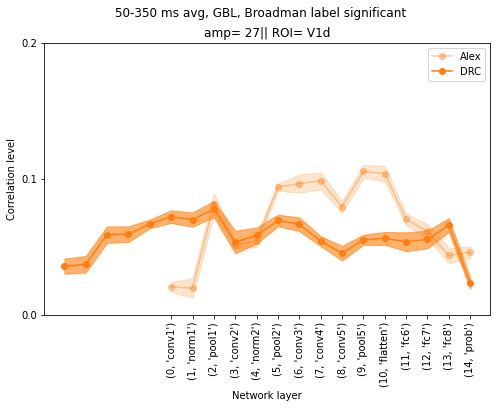

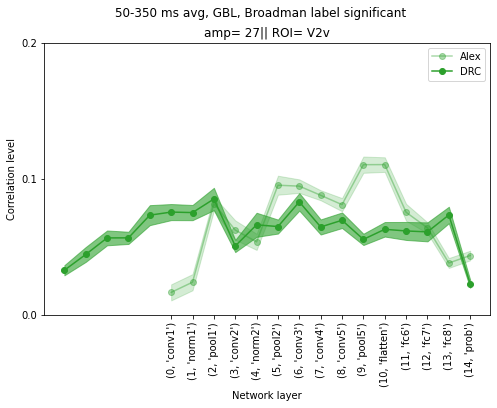

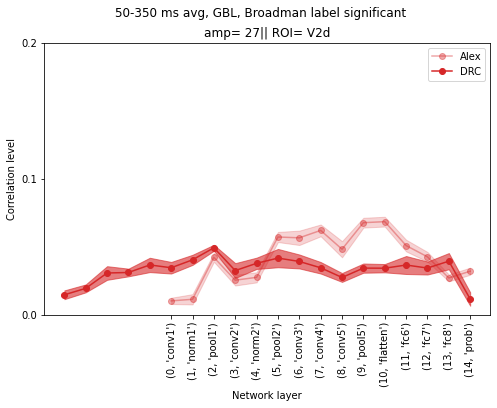

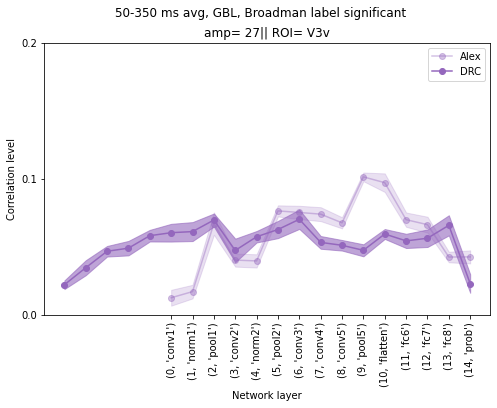

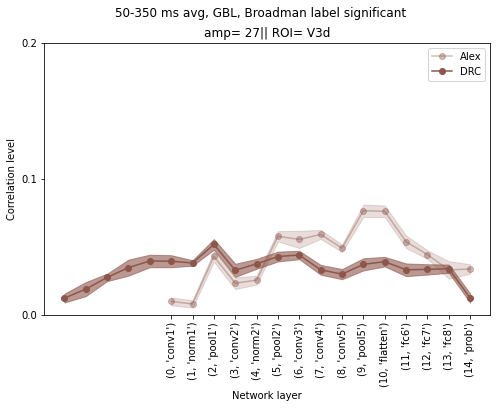

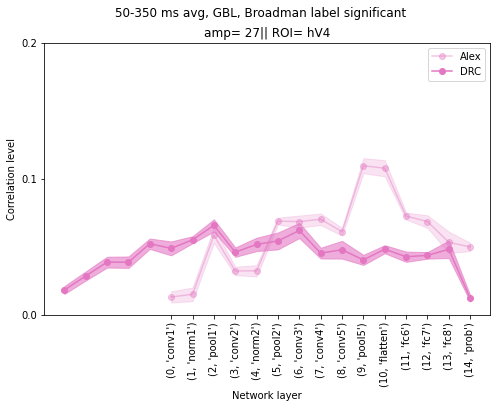

In [9]:
#ALEX
gap = 5
for amp in corr_dict_vis_all_drc_alex.keys():
    for i, key in enumerate(corr_dict_vis_all_drc_alex[amp].keys()):  
        x_vec_drc = [uu for uu in range(corr_dict_vis_all_drc_alex[amp]['V1v'].shape[-1])]
        x_vec_vgg = [uu for uu in range(gap, corr_dict_vis_all_vgg_alex['V1v'].shape[-1]+gap)]
#         x_vec_drc_alex = [uu for uu in range(corr_dict_vis_all_drc_alex[amp]['V1'].shape[-1])]
#         x_vec_vgg_alex = [uu for uu in range(5, corr_dict_vis_all_vgg_alex['V1'].shape[-1]+5)]
        plt.figure(figsize=(8, 5))
        # plt.errorbar(corr_mat70_all.mean(axis=0).T,corr_mat70_all.std(axis=0).T)
        # plt.plot(corr_mat70_all.mean(axis=0).T)
        # plt.plot(corr_mat70_all.std(axis=0).T)
        if i < len(x_vec_drc) - 1:
            plt.plot(x_vec_vgg,
                         corr_dict_vis_all_vgg_alex[key].mean(axis=0), marker= 'o', alpha=0.4, color = colors_drc[i])
            plt.fill_between(x_vec_vgg,
                         corr_dict_vis_all_vgg_alex[key].mean(axis=0)-corr_dict_vis_all_vgg_alex[key].std(axis=0),
                            corr_dict_vis_all_vgg_alex[key].mean(axis=0)+corr_dict_vis_all_vgg_alex[key].std(axis=0),alpha=0.2, color = colors_drc[i])

            plt.plot(x_vec_drc,
                         corr_dict_vis_all_drc_alex[amp][key].mean(axis=0), marker= 'o', color = colors_drc[i])
            plt.fill_between(x_vec_drc,
                         corr_dict_vis_all_drc_alex[amp][key].mean(axis=0)-corr_dict_vis_all_drc_alex[amp][key].std(axis=0),
                            corr_dict_vis_all_drc_alex[amp][key].mean(axis=0)+corr_dict_vis_all_drc_alex[amp][key].std(axis=0),alpha=0.6, color = colors_drc[i])


#             plt.plot(x_vec_vgg_alex,
#                              corr_dict_vis_all_vgg_alex[key].mean(axis=0),alpha=0.4, color = colors_alex[i])
#             plt.fill_between(x_vec_vgg_alex,
#                              corr_dict_vis_all_vgg_alex[key].mean(axis=0)-corr_dict_vis_all_vgg_alex[key].std(axis=0),
#                                 corr_dict_vis_all_vgg_alex[key].mean(axis=0)+corr_dict_vis_all_vgg_alex[key].std(axis=0),alpha=0.4, color = colors_alex[i])

#             plt.plot(x_vec_drc_alex,
#                          corr_dict_vis_all_drc_alex[amp][key].mean(axis=0), color = colors_alex[i])
#             plt.fill_between(x_vec_drc_alex,
#                          corr_dict_vis_all_drc_alex[amp][key].mean(axis=0)-corr_dict_vis_all_drc_alex[amp][key].std(axis=0),
#                             corr_dict_vis_all_drc_alex[amp][key].mean(axis=0)+corr_dict_vis_all_drc_alex[amp][key].std(axis=0),alpha=0.6, color = colors_alex[i])
        
        
#         plt.legend(['VGG', 'DRC', 'Alexnet', 'Alexnet DRC'])
        plt.legend(['Alex', 'DRC'])
        plt.title("amp= " + str(amp) + "|| ROI= "+ key)
#         plt.ylim([0,0.18])
        plt.xlabel("Network layer")
        plt.ylabel("Correlation level")
        plt.suptitle("50-350 ms avg, GBL, Broadman label significant")
        plt.yticks(np.arange(0,0.3,0.1))
        plt.xticks(range(gap, len(x_vec_drc)), [(i, l.name) for i,l in enumerate(model.layers)],rotation = 90)
#         plt.savefig("/home/mor/NDS_project/results_data/sub2/figs/Alexnet/amp_" + str(amp) + "_ROI_"+ key)
#         plt.savefig("/home/mor/NDS_project/results_data/sub2/figs/mixed/amp_" + str(amp) + "_ROI_"+ key)
#         plt.savefig("/home/mor/ECoG/results_data/figs/Alex/GBL_dist10/amp_" + str(amp) + "_ROI_"+ key)

In [68]:
#VGG
with open('/home/mor/ECoG/subjects_data/results/DRC_202311081326/corr_dict_vis_all.pkl', 'rb') as f:
    corr_dict_vis_all_drc = pkl.load(f)
    
    
with open('/home/mor/ECoG/subjects_data/results/FF_202311081434/corr_dict_vis_all.pkl', 'rb') as f:
    corr_dict_vis_all_vgg = pkl.load(f)
     

/tmp/ipykernel_3397/3621868778.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 5))


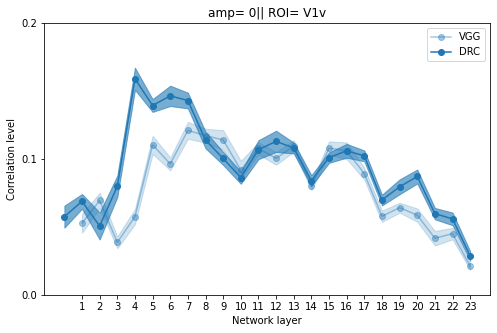

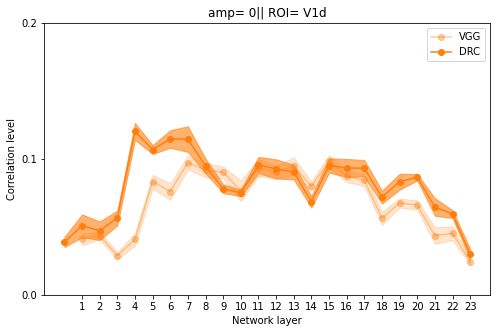

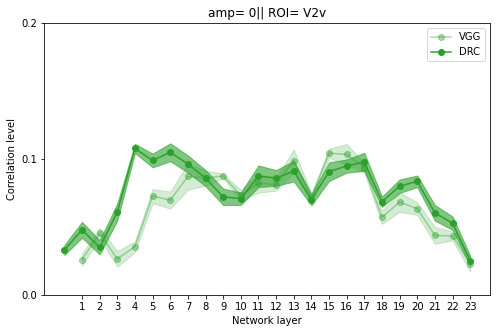

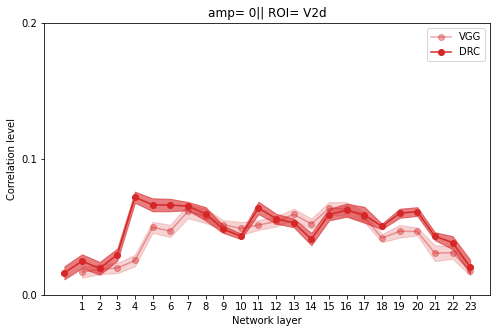

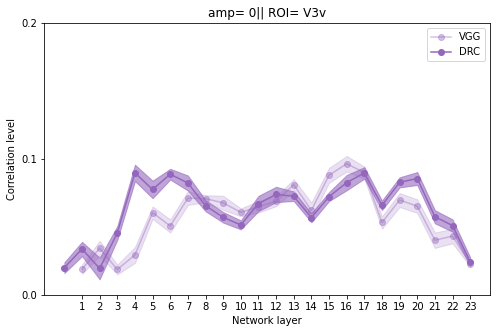

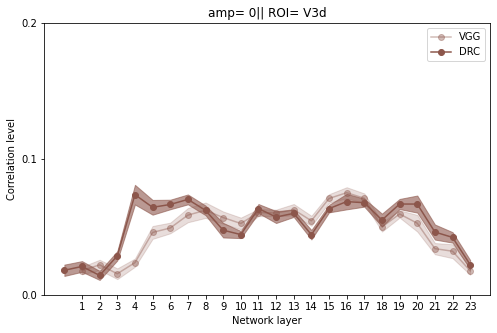

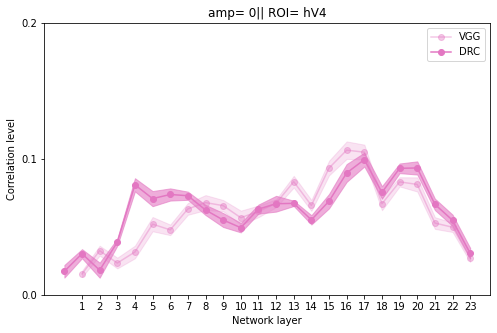

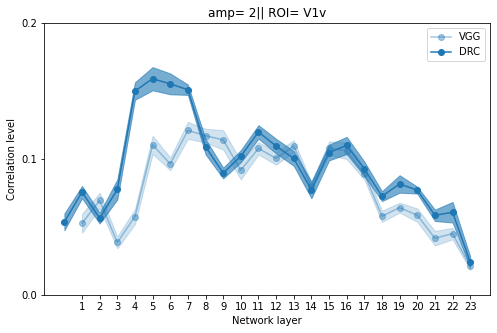

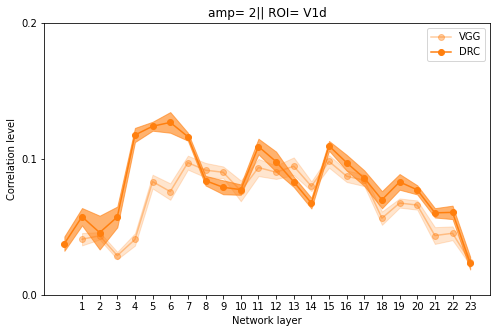

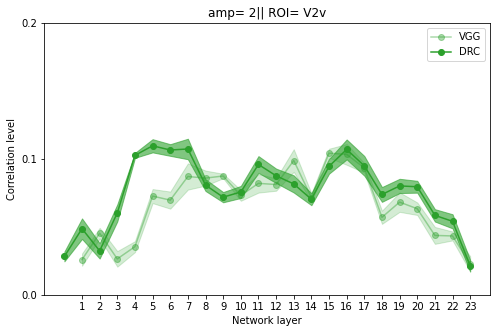

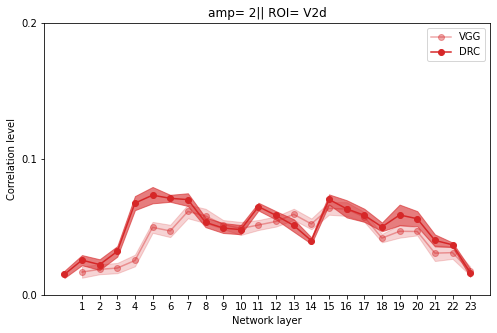

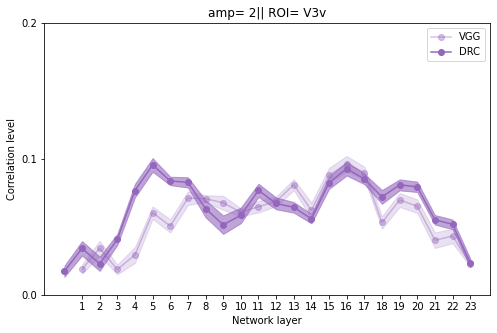

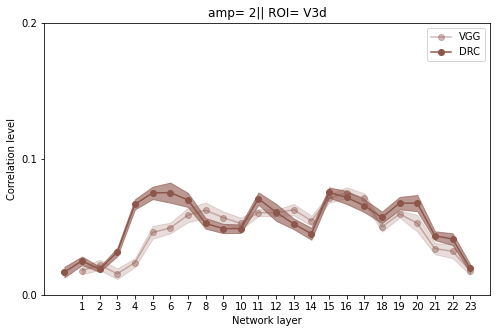

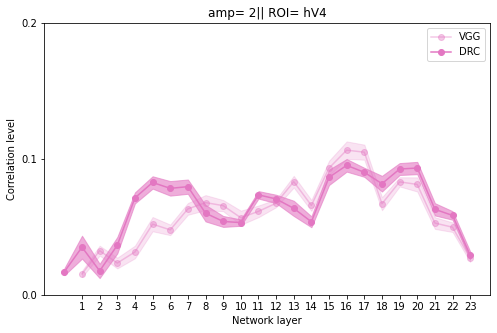

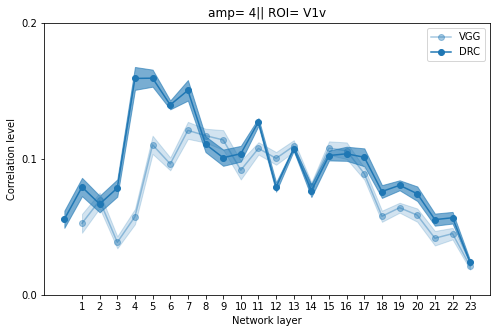

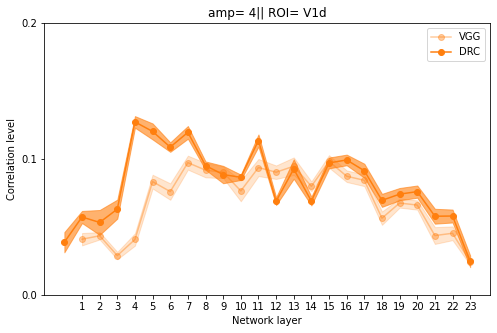

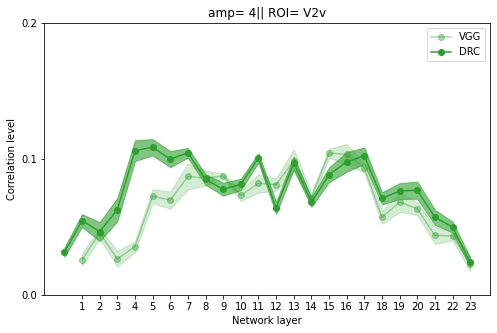

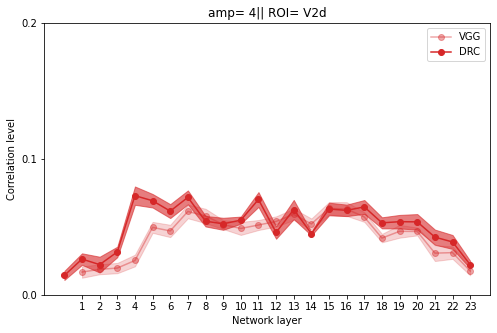

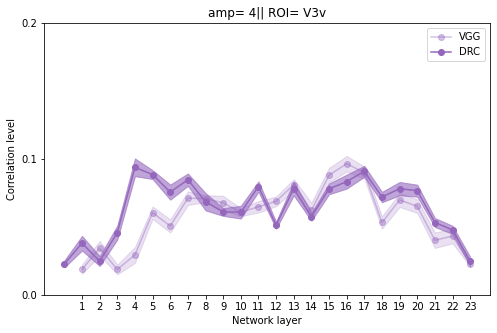

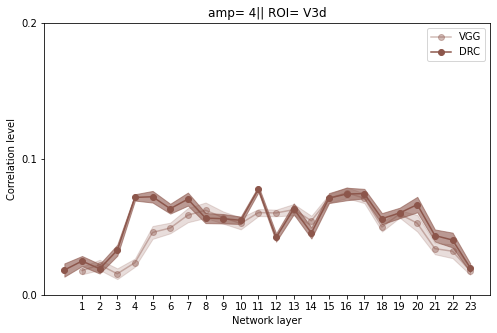

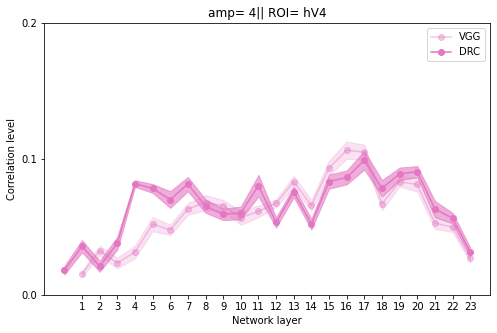

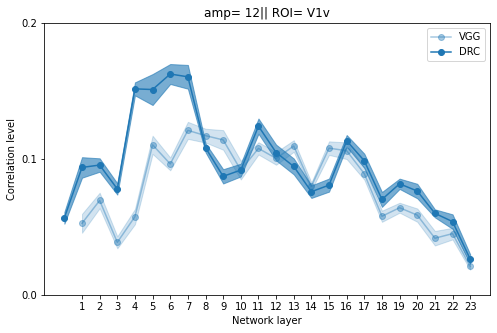

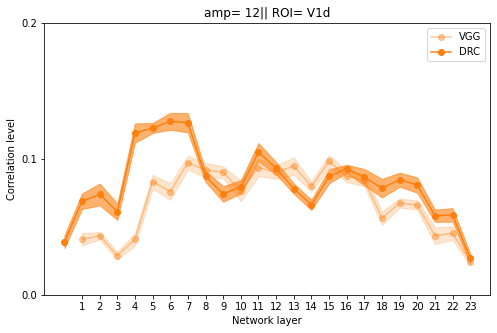

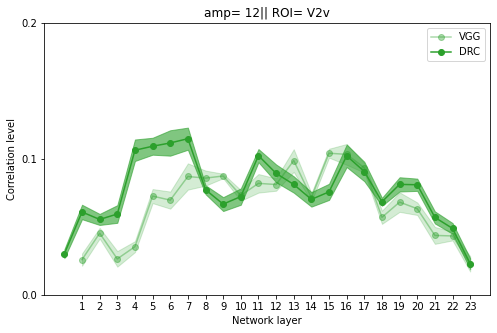

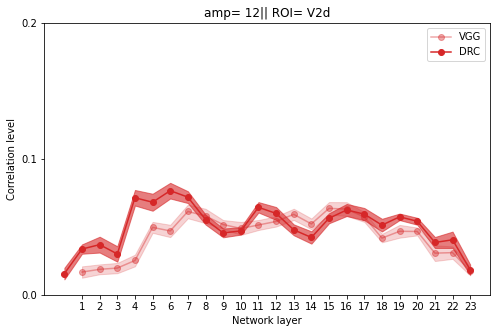

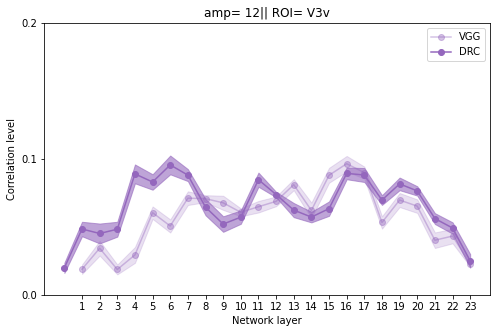

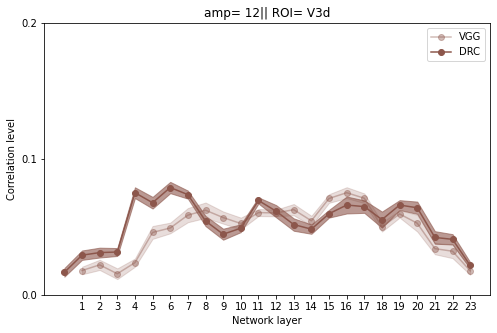

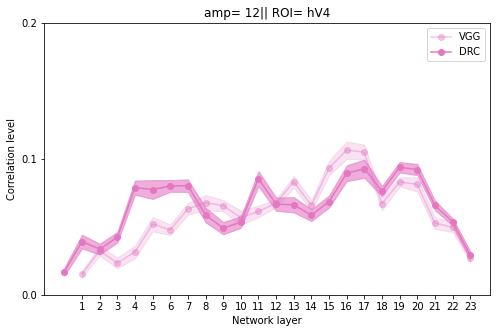

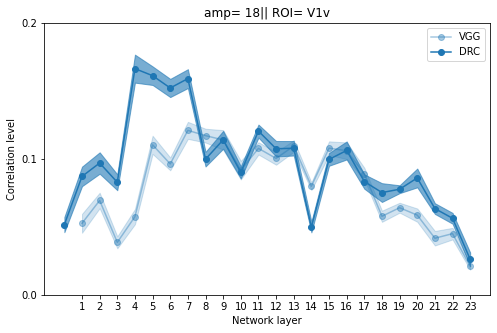

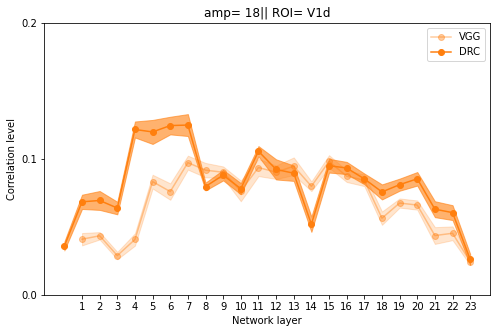

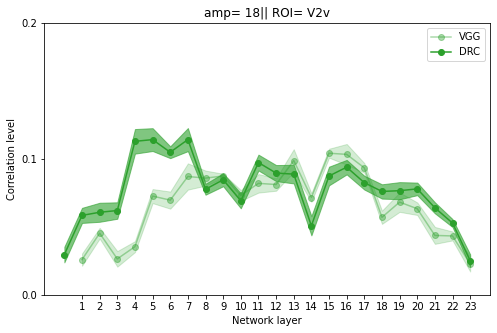

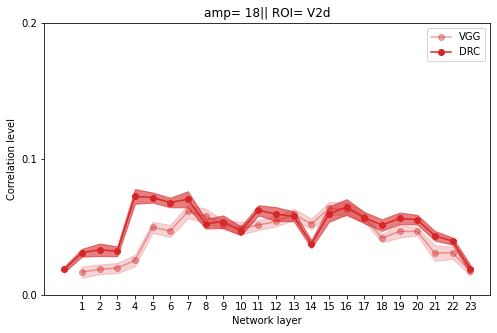

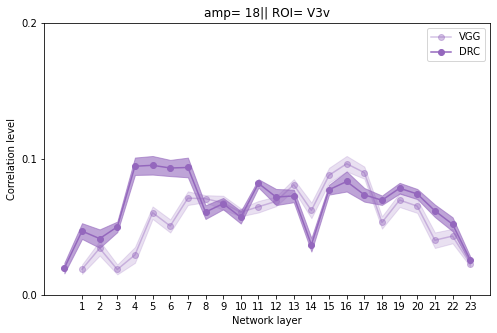

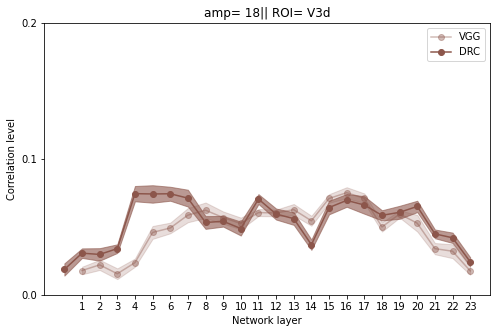

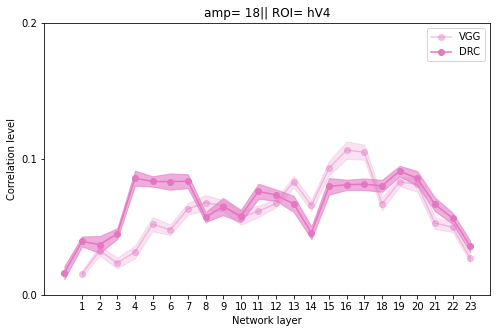

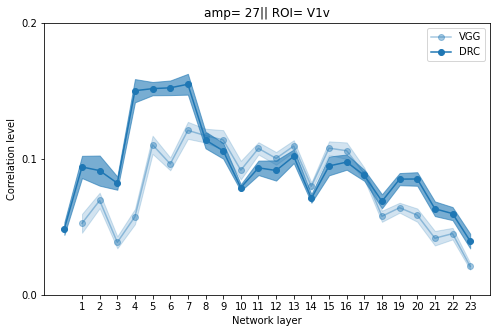

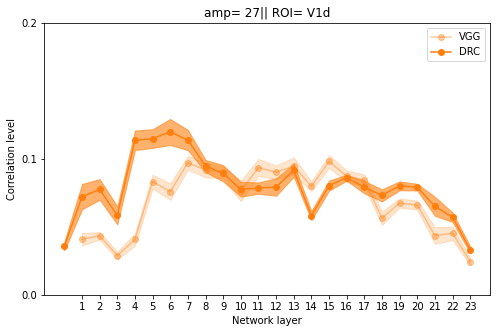

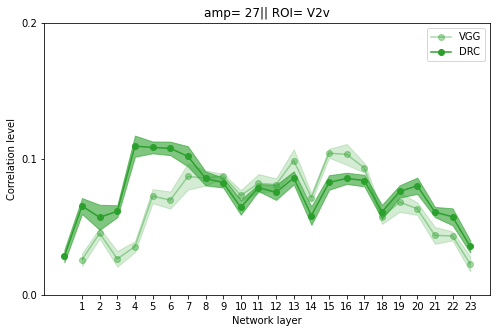

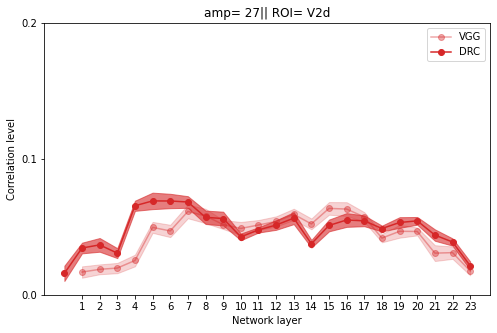

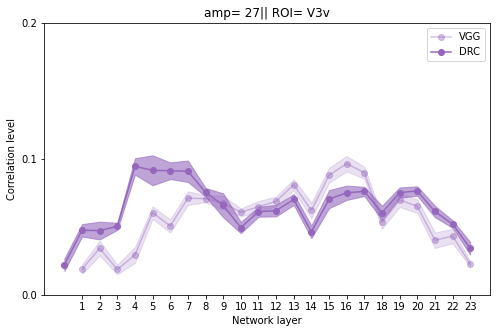

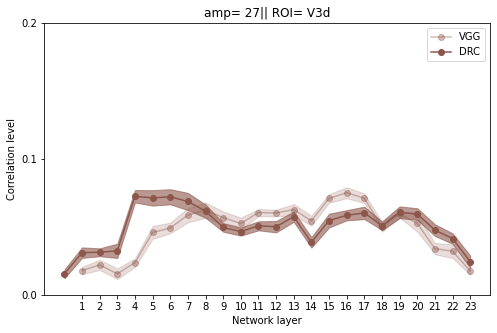

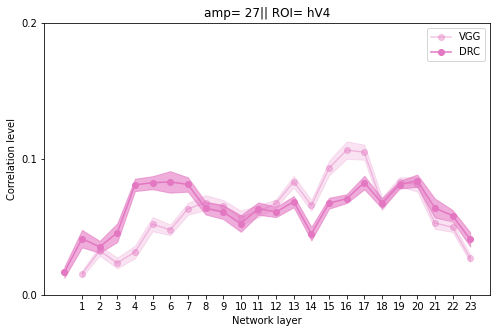

In [8]:
#VGG
gap = 1
for amp in corr_dict_vis_all_drc.keys():
    for i, key in enumerate(corr_dict_vis_all_drc[amp].keys()):  
        x_vec_drc = [uu for uu in range(corr_dict_vis_all_drc[amp]['V1v'].shape[-1])]
        x_vec_vgg = [uu for uu in range(gap, corr_dict_vis_all_vgg['V1v'].shape[-1]+gap)]
#         x_vec_drc_alex = [uu for uu in range(corr_dict_vis_all_drc_alex[amp]['V1'].shape[-1])]
#         x_vec_vgg_alex = [uu for uu in range(5, corr_dict_vis_all_vgg_alex['V1'].shape[-1]+5)]
        plt.figure(figsize=(8, 5))
        # plt.errorbar(corr_mat70_all.mean(axis=0).T,corr_mat70_all.std(axis=0).T)
        # plt.plot(corr_mat70_all.mean(axis=0).T)
        # plt.plot(corr_mat70_all.std(axis=0).T)
        if i < len(x_vec_drc) - 1:
            plt.plot(x_vec_vgg,
                         corr_dict_vis_all_vgg[key].mean(axis=0), marker= 'o', alpha=0.4, color = colors_drc[i])
            plt.fill_between(x_vec_vgg,
                         corr_dict_vis_all_vgg[key].mean(axis=0)-corr_dict_vis_all_vgg[key].std(axis=0),
                            corr_dict_vis_all_vgg[key].mean(axis=0)+corr_dict_vis_all_vgg[key].std(axis=0),alpha=0.2, color = colors_drc[i])

            plt.plot(x_vec_drc,
                         corr_dict_vis_all_drc[amp][key].mean(axis=0), marker= 'o', color = colors_drc[i])
            plt.fill_between(x_vec_drc,
                         corr_dict_vis_all_drc[amp][key].mean(axis=0)-corr_dict_vis_all_drc[amp][key].std(axis=0),
                            corr_dict_vis_all_drc[amp][key].mean(axis=0)+corr_dict_vis_all_drc[amp][key].std(axis=0),alpha=0.6, color = colors_drc[i])


#             plt.plot(x_vec_vgg_alex,
#                              corr_dict_vis_all_vgg_alex[key].mean(axis=0),alpha=0.4, color = colors_alex[i])
#             plt.fill_between(x_vec_vgg_alex,
#                              corr_dict_vis_all_vgg_alex[key].mean(axis=0)-corr_dict_vis_all_vgg_alex[key].std(axis=0),
#                                 corr_dict_vis_all_vgg_alex[key].mean(axis=0)+corr_dict_vis_all_vgg_alex[key].std(axis=0),alpha=0.4, color = colors_alex[i])

#             plt.plot(x_vec_drc_alex,
#                          corr_dict_vis_all_drc_alex[amp][key].mean(axis=0), color = colors_alex[i])
#             plt.fill_between(x_vec_drc_alex,
#                          corr_dict_vis_all_drc_alex[amp][key].mean(axis=0)-corr_dict_vis_all_drc_alex[amp][key].std(axis=0),
#                             corr_dict_vis_all_drc_alex[amp][key].mean(axis=0)+corr_dict_vis_all_drc_alex[amp][key].std(axis=0),alpha=0.6, color = colors_alex[i])
        
        
#         plt.legend(['VGG', 'DRC', 'Alexnet', 'Alexnet DRC'])
        plt.legend(['VGG', 'DRC'])
        plt.title("amp= " + str(amp) + "|| ROI= "+ key)
#         plt.ylim([0,0.18])
        plt.xlabel("Network layer")
        plt.ylabel("Correlation level")
#         plt.suptitle("50-350 ms avg, GBL, Broadman label significant")
        plt.yticks(np.arange(0.0,0.3,0.1))
        plt.xticks(range(gap, len(x_vec_drc)))
#         plt.savefig("/home/mor/NDS_project/results_data/sub2/figs/Alexnet/amp_" + str(amp) + "_ROI_"+ key)
#         plt.savefig("/home/mor/NDS_project/results_data/sub2/figs/mixed/amp_" + str(amp) + "_ROI_"+ key)
#         plt.savefig("/home/mor/ECoG/results_data/figs/VGG/GBL_dist10/amp_" + str(amp) + "_ROI_"+ key)

In [7]:
plt.savefig("/home/mor/ECoG/results_data/figs/VGG/0_350_avg_nozscore/amp_" + str(amp) + "_ROI_"+ key)

<Figure size 432x288 with 0 Axes>

In [70]:
np.mean(corr_dict_vis_all_vgg['V1'], axis=0)


array([ 0.0390993 , -0.04443637, -0.17283847, -0.08206615,  0.03752988,
        0.00420903,  0.0105995 ,  0.0283593 , -0.06178202, -0.03811328,
       -0.11158231, -0.05273859, -0.02193198,  0.15621543,  0.12697904,
        0.12805144,  0.0713286 ,  0.1444326 , -0.02043205,  0.1129371 ,
        0.08293998,  0.04667289,  0.11354949])

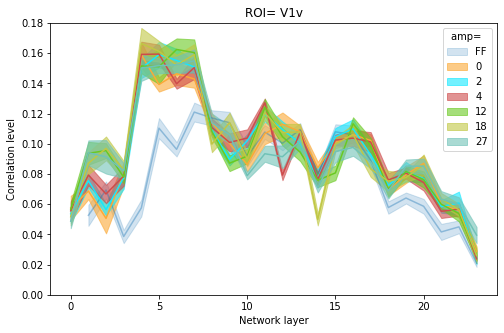

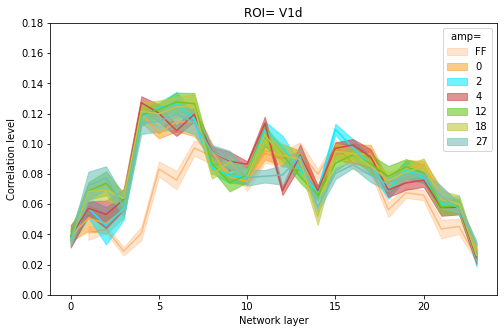

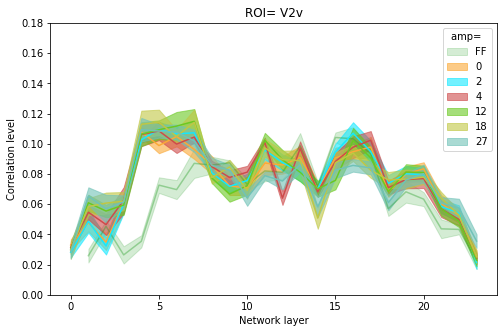

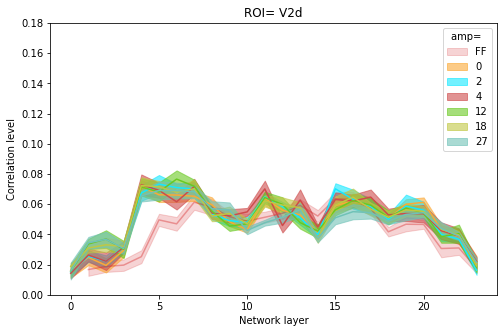

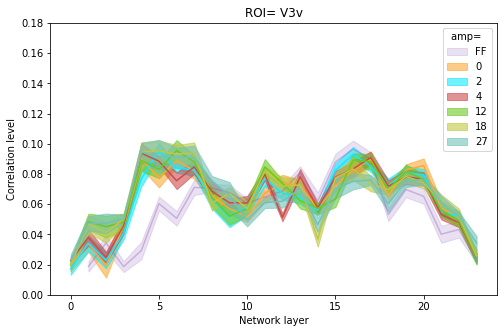

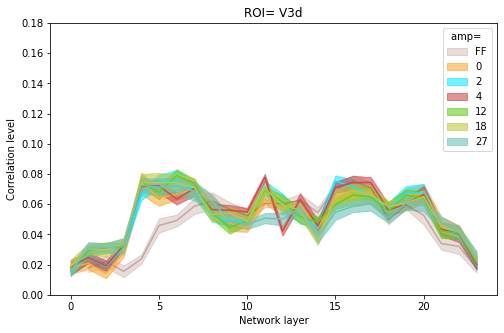

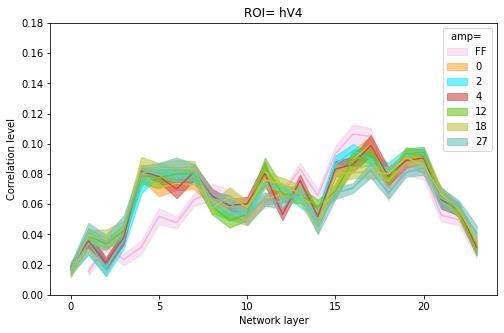

In [82]:
for j, amp in enumerate(corr_dict_vis_all_drc.keys()):
    for i, key in enumerate(corr_dict_vis_all_drc[amp].keys()):  
        x_vec_drc = [uu for uu in range(corr_dict_vis_all_drc[amp]['V1v'].shape[-1])]
        x_vec_vgg = [uu for uu in range(1, corr_dict_vis_all_vgg['V1v'].shape[-1]+1)]
        x_vec_drc_alex = [uu for uu in range(corr_dict_vis_all_drc_alex[amp]['V1v'].shape[-1])]
        x_vec_vgg_alex = [uu for uu in range(5, corr_dict_vis_all_vgg_alex['V1v'].shape[-1]+5)]
        plt.figure(i+1, figsize=(8, 5))
        # plt.errorbar(corr_mat70_all.mean(axis=0).T,corr_mat70_all.std(axis=0).T)
        # plt.plot(corr_mat70_all.mean(axis=0).T)
        # plt.plot(corr_mat70_all.std(axis=0).T)
        if i < len(x_vec_drc) - 1:
            if amp == 0:
                plt.plot(x_vec_vgg,
                             corr_dict_vis_all_vgg[key].mean(axis=0),alpha=0.4, color = colors_drc[i])
                plt.fill_between(x_vec_vgg,
                             corr_dict_vis_all_vgg[key].mean(axis=0)-corr_dict_vis_all_vgg[key].std(axis=0),
                                corr_dict_vis_all_vgg[key].mean(axis=0)+corr_dict_vis_all_vgg[key].std(axis=0),alpha=0.2, color = colors_drc[i], label='FF')

            plt.plot(x_vec_drc,
                         corr_dict_vis_all_drc[amp][key].mean(axis=0), color = colors_alex[j])
            plt.fill_between(x_vec_drc,
                         corr_dict_vis_all_drc[amp][key].mean(axis=0)-corr_dict_vis_all_drc[amp][key].std(axis=0),
                            corr_dict_vis_all_drc[amp][key].mean(axis=0)+corr_dict_vis_all_drc[amp][key].std(axis=0),alpha=0.6, color = colors_alex[j], label= str(amp))
        
        
        plt.legend(title="amp= ")
#         plt.legend(['VGG', 'DRC'])
        plt.title("ROI= "+ key)
        plt.ylim([0,0.18])
        plt.xlabel("Network layer")
        plt.ylabel("Correlation level")
#         plt.savefig("/home/mor/NDS_project/results_data/sub2/figs/Alexnet/amp_" + str(amp) + "_ROI_"+ key)
        plt.savefig("/home/mor/NDS_project/results_data/sub2/figs/mixed/amp_" + str(amp) + "_ROI_"+ key)

In [67]:
corr_dict_bodies_all_drc

{'EBA': array([[0.02272133, 0.03644355, 0.01925135, 0.02905414, 0.02779614,
         0.02376285, 0.03141037, 0.02609708, 0.03687833, 0.03659291,
         0.04551729, 0.04013458, 0.05227525, 0.06358496, 0.05203435,
         0.06808417, 0.10498085, 0.12516996, 0.11174255, 0.13159481,
         0.15229714, 0.17669446, 0.16846515, 0.09927221],
        [0.01948489, 0.02516283, 0.02025405, 0.033679  , 0.03435792,
         0.02528597, 0.02888491, 0.02680567, 0.04448991, 0.03410696,
         0.04302816, 0.04049637, 0.04798407, 0.06144949, 0.05321819,
         0.07205497, 0.10042126, 0.12088711, 0.1168993 , 0.12479328,
         0.16199441, 0.16181337, 0.18172269, 0.10120345],
        [0.02027127, 0.02496337, 0.0184405 , 0.03434724, 0.03311534,
         0.02658646, 0.02809554, 0.02217224, 0.03055146, 0.03374349,
         0.04302251, 0.04281943, 0.0462672 , 0.05927879, 0.05293104,
         0.06737974, 0.10187254, 0.1249256 , 0.1137632 , 0.13917135,
         0.14783375, 0.1691303 , 0.16934856, 0.10

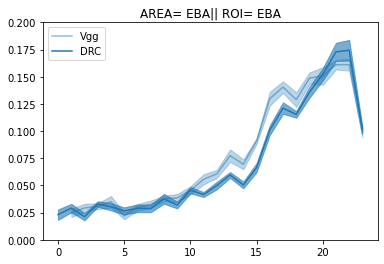

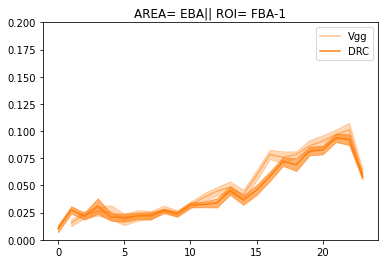

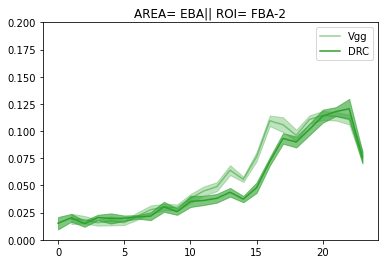

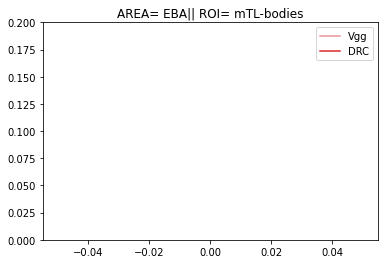

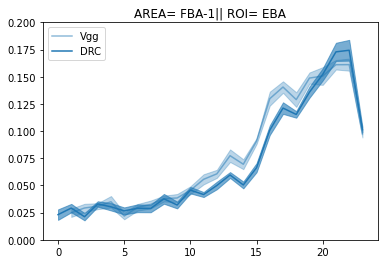

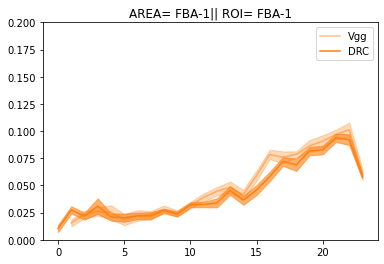

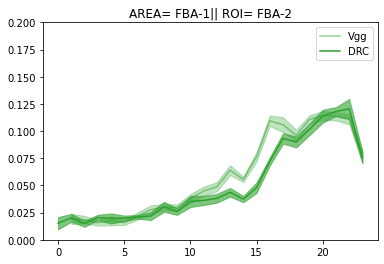

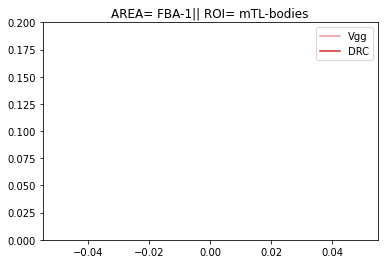

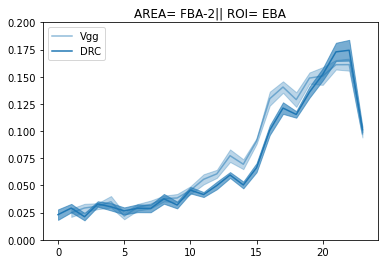

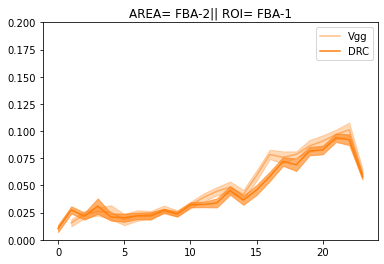

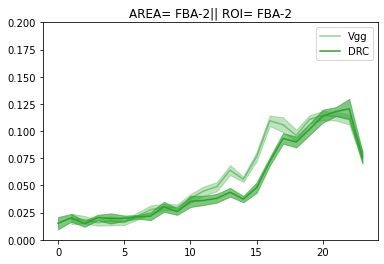

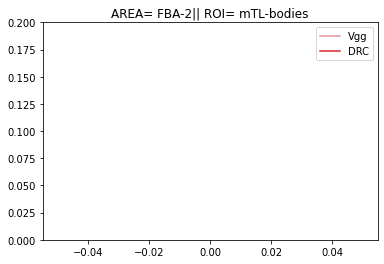

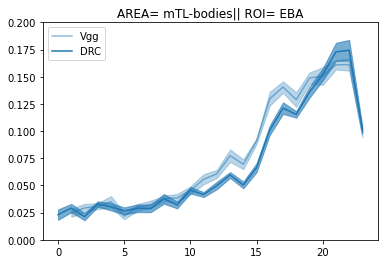

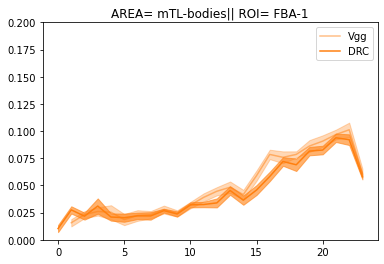

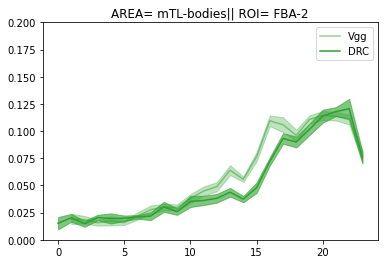

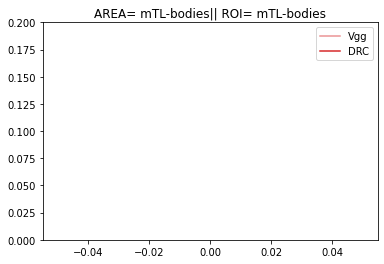

In [76]:
for amp in corr_dict_bodies_all_vgg.keys():
    for i, key in enumerate(corr_dict_bodies_all_vgg.keys()):
        x_vec_drc = [uu for uu in range(corr_dict_bodies_all_drc['EBA'].shape[-1])]
        x_vec_vgg = [uu for uu in range(1, corr_dict_bodies_all_vgg['EBA'].shape[-1]+1)]
        plt.figure()
        # plt.errorbar(corr_mat70_all.mean(axis=0).T,corr_mat70_all.std(axis=0).T)
        # plt.plot(corr_mat70_all.mean(axis=0).T)
        # plt.plot(corr_mat70_all.std(axis=0).T)
        if i < len(x_vec_drc) - 1:
            plt.plot(x_vec_vgg,
                         corr_dict_bodies_all_vgg[key].mean(axis=0) ,alpha=0.5, color = colors_drc[i])
            plt.fill_between(x_vec_vgg,
                         corr_dict_bodies_all_vgg[key].mean(axis=0)-corr_dict_bodies_all_vgg[key].std(axis=0),
                            corr_dict_bodies_all_vgg[key].mean(axis=0)+corr_dict_bodies_all_vgg[key].std(axis=0),alpha=0.3, color = colors_drc[i])

        plt.plot(x_vec_drc,
                     corr_dict_bodies_all_drc[key].mean(axis=0), color = colors_drc[i])
        plt.fill_between(x_vec_drc,
                     corr_dict_bodies_all_drc[key].mean(axis=0)-corr_dict_bodies_all_drc[key].std(axis=0),
                        corr_dict_bodies_all_drc[key].mean(axis=0)+corr_dict_bodies_all_drc[key].std(axis=0),alpha=0.6, color = colors_drc[i])
        plt.legend(['Vgg', 'DRC'])
        plt.title("AREA= " + str(amp) + "|| ROI= "+ key)
        plt.ylim([0,0.2])



In [ ]:
x_vec_vgg